In [17]:
import pandas as pd
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\EDA-5. Проектирование экспериментов/KaggleV2-May-2016.csv')
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


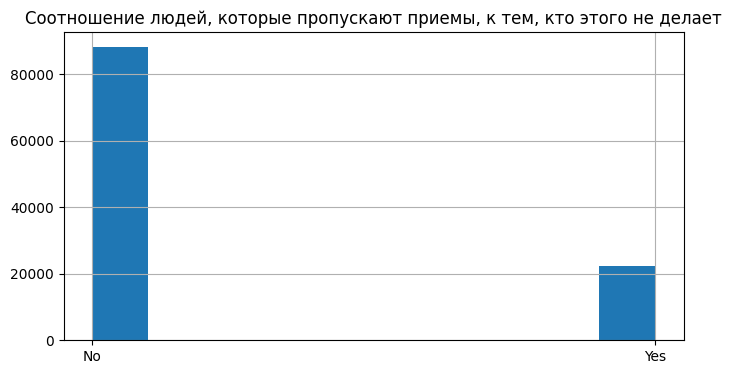

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [19]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

In [20]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

In [21]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)
encoded_columns.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [22]:
import logging

In [23]:
logging.basicConfig(level=logging.DEBUG)

In [24]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG: 2024-06-06 07:32:57,689: This is a debug message
INFO: 2024-06-06 07:32:57,690: This is an informational message
ERROR: 2024-06-06 07:32:57,692: This is an error message
CRITICAL: 2024-06-06 07:32:57,693: This is a critical message


In [25]:
logging.FileHandler('log_file.log')

<FileHandler c:\скил\DST-156\IDE_NEW\EDA-5. Проектирование экспериментов\log_file.log (NOTSET)>

In [26]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2024-06-06 07:32:57,723: Check


In [27]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [28]:
!mkdir logs

�������� ��� 䠩� logs 㦥 �������.


In [29]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2024-06-06 07:32:57,782: Data
INFO: 2024-06-06 07:32:57,782: Data shape (110527, 14)
C:\Users\molde\AppData\Local\Temp\ipykernel_26240\2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2024-06-06 07:32:57,793: Percentage of women: 0.653882342398853
C:\Users\molde\AppData\Local\Temp\ipykernel_26240\2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO: 2024-06-06 07:32:57,802:

In [30]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2024-06-06 07:32:57,810: Data shape is incorrect!


884dAQETf3q1pRZKc8UNqoGZS

In [32]:
pip install comet_ml

   ---------------------------------------- 0.0/663.9 kB ? eta -:--:--
   --- ------------------------------------ 61.4/663.9 kB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 358.4/663.9 kB 4.5 MB/s eta 0:00:01
   -------------------------------- ------- 532.5/663.9 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 663.9/663.9 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/600.5 kB ? eta -:--:--
   ----- ---------------------------------- 81.9/600.5 kB ? eta -:--:--
   ----------------------------- ---------- 440.3/600.5 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 600.5/600.5 kB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.3 kB ? eta -:--:--
   ---------------------------------------- 88.3/88.3 kB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/957.4 kB ? eta -:--:--
   -- ------------------------------------- 61.4/957.4 kB 1.6 MB/s eta 0:00:01
   ---- -

In [36]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="884dAQETf3q1pRZKc8UNqoGZS",
    project_name="medical-appointment",
    workspace="alexgorel",
)
experiment.end()
display(experiment)

DEBUG: 2024-06-06 07:37:33,933: No INI file found: []
DEBUG: 2024-06-06 07:37:33,935: No INI file found: ['./.comet.config']
DEBUG: 2024-06-06 07:37:33,937: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2024-06-06 07:37:33,939: No INI file found: ['~/.comet.config']
DEBUG: 2024-06-06 07:37:33,940: Looking up key: disable, namespace: ['comet', 'auto_log']
DEBUG: 2024-06-06 07:37:33,940: Searching <ConfigOSEnv> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-06-06 07:37:33,941: Searching <ConfigEnvFileEnv: None> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-06-06 07:37:33,943: Searching <ConfigDictEnv: {}> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-06-06 07:37:33,944: Found nothing--returning NO_VALUE
DEBUG: 2024-06-06 07:37:33,945: Looking up key: url_override, namespace: ['comet']
DEBUG: 2024-06-06 07:37:33,947: Searching <ConfigOSEnv> for COMET_URL_OVERRIDE
DEBUG: 2024-06-06 07:37:33,948: Searching <ConfigEnvFileEnv: None> for COMET_URL_OVERRIDE
DEBUG: 2024-06-06 07:37:33,949: Search

DEBUG: 2024-06-06 07:37:33,977: Searching <ConfigOSEnv> for COMET_DISPLAY_SUMMARY
DEBUG: 2024-06-06 07:37:33,980: Searching <ConfigEnvFileEnv: None> for COMET_DISPLAY_SUMMARY
DEBUG: 2024-06-06 07:37:33,982: Searching <ConfigDictEnv: {}> for COMET_DISPLAY_SUMMARY
DEBUG: 2024-06-06 07:37:33,985: Found nothing--returning NO_VALUE
DEBUG: 2024-06-06 07:37:33,988: Looking up key: display_summary_level, namespace: ['comet']
DEBUG: 2024-06-06 07:37:33,991: Searching <ConfigOSEnv> for COMET_DISPLAY_SUMMARY_LEVEL
DEBUG: 2024-06-06 07:37:33,995: Searching <ConfigEnvFileEnv: None> for COMET_DISPLAY_SUMMARY_LEVEL
DEBUG: 2024-06-06 07:37:33,997: Searching <ConfigDictEnv: {}> for COMET_DISPLAY_SUMMARY_LEVEL
DEBUG: 2024-06-06 07:37:33,999: Found nothing--returning NO_VALUE
DEBUG: 2024-06-06 07:37:34,002: Looking up key: distributed_node_identifier, namespace: ['comet']
DEBUG: 2024-06-06 07:37:34,004: Searching <ConfigOSEnv> for COMET_DISTRIBUTED_NODE_IDENTIFIER
DEBUG: 2024-06-06 07:37:34,007: Searchin